In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 1. Specify Pathfile

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# 2. Specify Number of Classes

In [3]:
NUM_CLASSES = 56

# 3. Reading Dataset

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2)+1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=42)

# 4. Training Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 256)               11008     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 56)                7224      
                                                                 
Total params: 51,128
Trainable params: 51,128
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
171/172 [============================>.] - ETA: 0s - loss: 3.3350 - accuracy: 0.1382
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 2s 8ms/step - loss: 3.3337 - accuracy: 0.1381 - val_loss: 2.5630 - val_accuracy: 0.2920
Epoch 2/1000
172/172 [==============================] - ETA: 0s - loss: 2.3811 - accuracy: 0.2930
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 1s 5ms/step - loss: 2.3811 - accuracy: 0.2930 - val_loss: 1.7535 - val_accuracy: 0.5251
Epoch 3/1000
171/172 [============================>.] - ETA: 0s - loss: 1.9204 - accuracy: 0.3887
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
172/172 [==============================] - 1s 7ms/step - loss: 1.9189 - accuracy: 0.3887 - val_loss: 1.3695 - val_accuracy: 0.5912
Epoch 4/1000
162/172 [===========================>..] - ETA: 0s - loss: 1.7293 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=32)

58/58 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8805


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[5.1323418e-06 6.5244526e-06 6.7840668e-04 5.7162240e-11 3.0886784e-09
 3.4588511e-04 5.5926295e-05 2.5186206e-11 2.3081732e-06 2.2543377e-11
 3.1371957e-05 1.4875659e-05 1.9071048e-01 2.3784123e-08 1.1534235e-10
 9.9606645e-05 6.7922957e-13 1.3010308e-10 6.0256476e-05 8.2293910e-04
 6.2844497e-01 2.3935122e-06 4.2734101e-09 3.5688913e-10 1.7213662e-01
 1.1486267e-06 2.0867319e-07 8.3948457e-08 6.2240821e-07 1.8716896e-08
 2.5475331e-04 1.0456631e-04 3.3883862e-07 5.7660909e-03 2.5136413e-09
 4.2971875e-05 1.3596364e-05 4.9712912e-10 7.8546653e-10 1.0422949e-08
 6.9744210e-10 1.9118939e-04 3.6944947e-08 4.5800767e-05 4.6958859e-05
 1.1625779e-11 1.3344680e-09 1.0555244e-05 1.2444182e-06 1.2558943e-14
 1.2611212e-12 3.7473367e-09 3.1777832e-05 5.2208165e-06 6.5182867e-05
 2.1852895e-09]
20


# 5. Check Trained Model

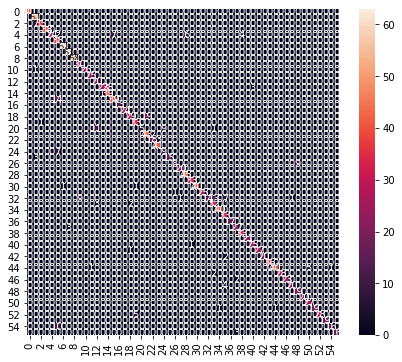

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.84      1.00      0.91        57
           2       0.97      0.83      0.90        42
           3       1.00      1.00      1.00        38
           4       1.00      0.56      0.72        43
           5       0.54      1.00      0.70        38
           6       0.98      1.00      0.99        62
           7       0.95      1.00      0.98        63
           8       1.00      1.00      1.00        58
           9       0.77      1.00      0.87        30
          10       1.00      0.96      0.98        27
          11       0.96      1.00      0.98        25
          12       0.59      1.00      0.74        20
          13       0.96      0.43      0.59        54
          14       0.58      0.97      0.73        40
          15       0.85      0.74      0.79        53
          16       1.00      1.00      1.00        13
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# 6. Check Trained Model

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/fr/jbv693556wl33l33vy0f6c080000gn/T/tmpheslzp1z/assets


54424

# Inference test